In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import warnings

In [4]:
warnings.filterwarnings("ignore")

In [5]:
dftrain = pd.read_csv(r"C:\Users\akhil\Downloads\archive (14)\aug_train.csv")

In [6]:
dftrain

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,167647,Male,22,1,7.0,1,< 1 Year,No,2630.0,152.0,16,0
1,17163,Male,42,1,28.0,0,1-2 Year,Yes,43327.0,26.0,135,0
2,32023,Female,66,1,33.0,0,1-2 Year,Yes,35841.0,124.0,253,0
3,87447,Female,22,1,33.0,0,< 1 Year,No,27645.0,152.0,69,0
4,501933,Male,28,1,46.0,1,< 1 Year,No,29023.0,152.0,211,0
...,...,...,...,...,...,...,...,...,...,...,...,...
382149,164549,Male,24,1,15.0,0,< 1 Year,Yes,23938.0,152.0,105,0
382150,247064,Male,27,1,28.0,1,< 1 Year,No,336395.0,152.0,144,0
382151,165293,Male,45,1,28.0,0,1-2 Year,Yes,40443.0,26.0,187,0
382152,383241,Female,28,1,28.0,1,< 1 Year,No,25380.0,152.0,208,0


In [7]:
dftrain.drop("id",axis = 1,inplace = True)

In [8]:
dftrain.dtypes

Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [9]:
dftrain["Response"].value_counts()

Response
0    319553
1     62601
Name: count, dtype: int64

### Error Detection

In [11]:
import matplotlib.pyplot as plt

In [12]:
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

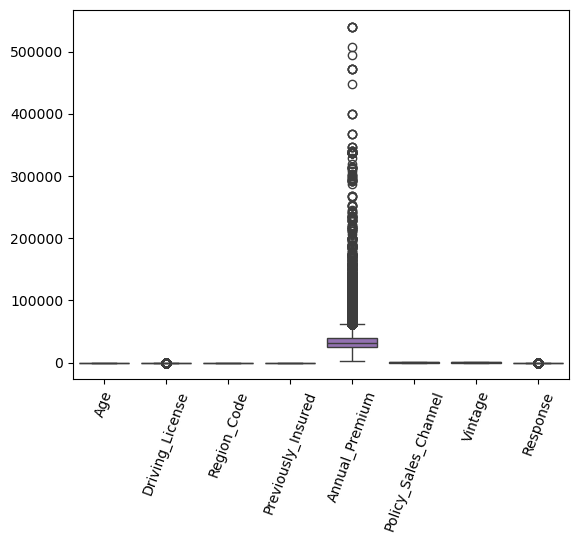

In [13]:
sns.boxplot(dftrain)
plt.xticks(rotation=70)
plt.show

In [14]:
dftrain.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [15]:
dftrain["Driving_License"]

0         1
1         1
2         1
3         1
4         1
         ..
382149    1
382150    1
382151    1
382152    1
382153    1
Name: Driving_License, Length: 382154, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

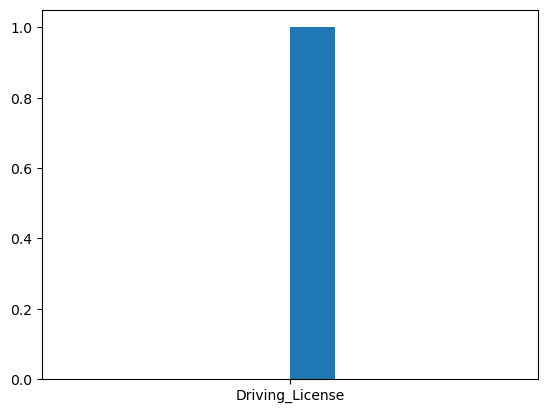

In [16]:
plt.hist("Driving_License")
plt.show

In [17]:
dftrain["Driving_License"].skew().round()

-23.0

<function matplotlib.pyplot.show(close=None, block=None)>

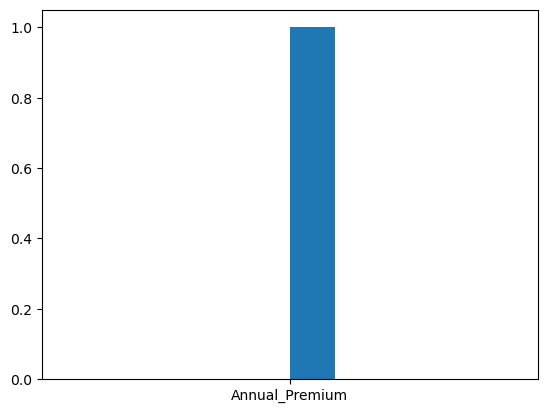

In [18]:
plt.hist('Annual_Premium')
plt.show

In [19]:
dftrain['Annual_Premium'].skew().round()

2.0

<function matplotlib.pyplot.show(close=None, block=None)>

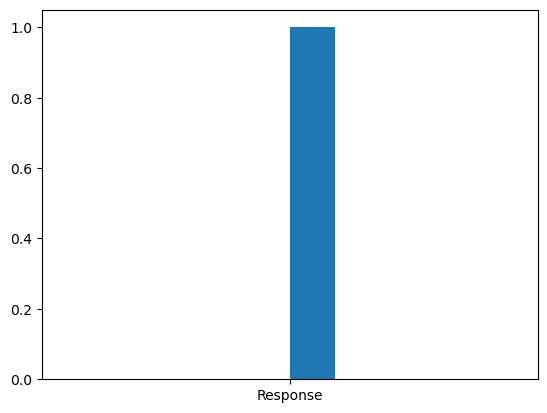

In [20]:
plt.hist('Response')
plt.show

In [21]:
cols = ["Driving_License",'Annual_Premium']

In [22]:
for c in cols:
    print(c)

Driving_License
Annual_Premium


In [23]:
for c in cols:
    print(dftrain[c])

0         1
1         1
2         1
3         1
4         1
         ..
382149    1
382150    1
382151    1
382152    1
382153    1
Name: Driving_License, Length: 382154, dtype: int64
0           2630.0
1          43327.0
2          35841.0
3          27645.0
4          29023.0
            ...   
382149     23938.0
382150    336395.0
382151     40443.0
382152     25380.0
382153     30396.0
Name: Annual_Premium, Length: 382154, dtype: float64


In [24]:
for c in cols:
    sk = dftrain[c].skew().round()
    if sk == 0 or sk == -0:
        m = dftrain[c].mean()
        s =dftrain[c].std()
        low = m  - 3 * s
        up = m + 3 * s
        dftrain[c] = dftrain[c].map(lambda x : low if x < low else up if x > up else x)
    else:
        q1 = dftrain[c].quantile(0.25)
        q3 = dftrain[c].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - (1.5 * iqr)
        upper = q3 + (1.5 * iqr)
        dftrain[c] = dftrain[c].map(lambda x : lower if x < lower else upper if x > upper else x)
        


In [25]:
dftrain

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,22,1.0,7.0,1,< 1 Year,No,2630.000,152.0,16,0
1,Male,42,1.0,28.0,0,1-2 Year,Yes,43327.000,26.0,135,0
2,Female,66,1.0,33.0,0,1-2 Year,Yes,35841.000,124.0,253,0
3,Female,22,1.0,33.0,0,< 1 Year,No,27645.000,152.0,69,0
4,Male,28,1.0,46.0,1,< 1 Year,No,29023.000,152.0,211,0
...,...,...,...,...,...,...,...,...,...,...,...
382149,Male,24,1.0,15.0,0,< 1 Year,Yes,23938.000,152.0,105,0
382150,Male,27,1.0,28.0,1,< 1 Year,No,61800.375,152.0,144,0
382151,Male,45,1.0,28.0,0,1-2 Year,Yes,40443.000,26.0,187,0
382152,Female,28,1.0,28.0,1,< 1 Year,No,25380.000,152.0,208,0


<function matplotlib.pyplot.show(close=None, block=None)>

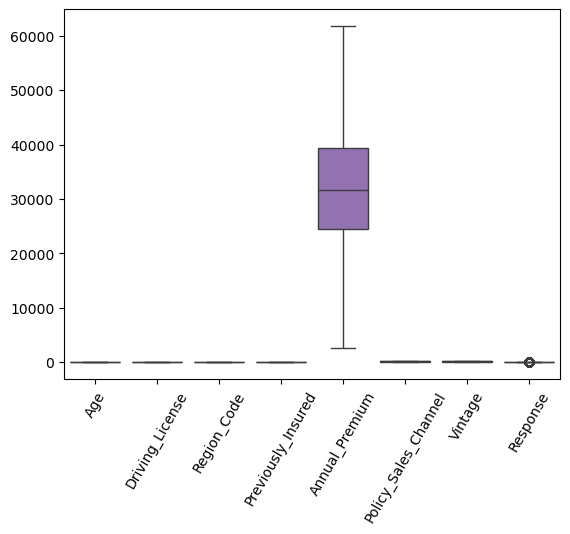

In [26]:
sns.boxplot(dftrain)
plt.xticks(rotation=60)
plt.show

### Encoding

In [28]:
dftrain.dtypes

Gender                   object
Age                       int64
Driving_License         float64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [29]:
dftrain["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [30]:
dftrain["Vehicle_Age"].unique()

array(['< 1 Year', '1-2 Year', '> 2 Years'], dtype=object)

In [31]:
dftrain["Vehicle_Damage"].unique()

array(['No', 'Yes'], dtype=object)

In [32]:
from sklearn.preprocessing import OneHotEncoder

In [33]:
ohe = OneHotEncoder()

In [34]:
ohe

OneHotEncoder()

In [35]:
ohe.fit(dftrain[["Gender"]])

OneHotEncoder()

In [36]:
ohe.transform(dftrain[["Gender"]])

<382154x2 sparse matrix of type '<class 'numpy.float64'>'
	with 382154 stored elements in Compressed Sparse Row format>

In [37]:
ary = ohe.transform(dftrain[["Gender"]]).toarray()

In [38]:
ary

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [39]:
df = pd.DataFrame(ary,dtype= "int",columns=['Female', 'Male'])

In [40]:
dftrain = pd.concat([dftrain,df],axis = 1)

In [41]:
dftrain

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Female,Male
0,Male,22,1.0,7.0,1,< 1 Year,No,2630.000,152.0,16,0,0,1
1,Male,42,1.0,28.0,0,1-2 Year,Yes,43327.000,26.0,135,0,0,1
2,Female,66,1.0,33.0,0,1-2 Year,Yes,35841.000,124.0,253,0,1,0
3,Female,22,1.0,33.0,0,< 1 Year,No,27645.000,152.0,69,0,1,0
4,Male,28,1.0,46.0,1,< 1 Year,No,29023.000,152.0,211,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
382149,Male,24,1.0,15.0,0,< 1 Year,Yes,23938.000,152.0,105,0,0,1
382150,Male,27,1.0,28.0,1,< 1 Year,No,61800.375,152.0,144,0,0,1
382151,Male,45,1.0,28.0,0,1-2 Year,Yes,40443.000,26.0,187,0,0,1
382152,Female,28,1.0,28.0,1,< 1 Year,No,25380.000,152.0,208,0,1,0


In [42]:
dftrain[["Vehicle_Age"]]

,Vehicle_Age
0,< 1 Year
1,1-2 Year
2,1-2 Year
3,< 1 Year
4,< 1 Year
...,...
382149,< 1 Year
382150,< 1 Year
382151,1-2 Year
382152,< 1 Year


In [43]:
dftrain["Vehicle_Age"].unique()

array(['< 1 Year', '1-2 Year', '> 2 Years'], dtype=object)

In [44]:
from sklearn.preprocessing import OrdinalEncoder

In [45]:
ord = OrdinalEncoder()

In [46]:
ord

OrdinalEncoder()

In [47]:
ord.fit(dftrain[["Vehicle_Age"]])

OrdinalEncoder()

In [48]:
ord.transform(dftrain[["Vehicle_Age"]])

array([[1.],
       [0.],
       [0.],
       ...,
       [0.],
       [1.],
       [1.]])

In [49]:
ord.categories_

[array(['1-2 Year', '< 1 Year', '> 2 Years'], dtype=object)]

In [50]:
ary1 = ord.transform(dftrain[["Vehicle_Age"]])

In [51]:
ary1

array([[1.],
       [0.],
       [0.],
       ...,
       [0.],
       [1.],
       [1.]])

In [52]:
df1 = pd.DataFrame(ary1,dtype="int",columns= ["Vechicle_Age_Past"])

In [53]:
dftrain = pd.concat([dftrain,df1],axis = 1)

In [54]:
dftrain

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Female,Male,Vechicle_Age_Past
0,Male,22,1.0,7.0,1,< 1 Year,No,2630.000,152.0,16,0,0,1,1
1,Male,42,1.0,28.0,0,1-2 Year,Yes,43327.000,26.0,135,0,0,1,0
2,Female,66,1.0,33.0,0,1-2 Year,Yes,35841.000,124.0,253,0,1,0,0
3,Female,22,1.0,33.0,0,< 1 Year,No,27645.000,152.0,69,0,1,0,1
4,Male,28,1.0,46.0,1,< 1 Year,No,29023.000,152.0,211,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382149,Male,24,1.0,15.0,0,< 1 Year,Yes,23938.000,152.0,105,0,0,1,1
382150,Male,27,1.0,28.0,1,< 1 Year,No,61800.375,152.0,144,0,0,1,1
382151,Male,45,1.0,28.0,0,1-2 Year,Yes,40443.000,26.0,187,0,0,1,0
382152,Female,28,1.0,28.0,1,< 1 Year,No,25380.000,152.0,208,0,1,0,1


In [55]:
dftrain[["Vehicle_Damage"]]

,Vehicle_Damage
0,No
1,Yes
2,Yes
3,No
4,No
...,...
382149,Yes
382150,No
382151,Yes
382152,No


In [56]:
ohe1 = OneHotEncoder()

In [57]:
ohe1.fit(dftrain[["Vehicle_Damage"]])

OneHotEncoder()

In [58]:
ohe1.transform(dftrain[["Vehicle_Damage"]])

<382154x2 sparse matrix of type '<class 'numpy.float64'>'
	with 382154 stored elements in Compressed Sparse Row format>

In [59]:
ary2 =ohe1.transform(dftrain[["Vehicle_Damage"]]).toarray()

In [60]:
ohe1.categories_

[array(['No', 'Yes'], dtype=object)]

In [61]:
ary2

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [62]:
df2 = pd.DataFrame(ary2,dtype= "int",columns = ['No', 'Yes'])

In [63]:
df2

,No,Yes
0,1,0
1,0,1
2,0,1
3,1,0
4,1,0
...,...,...
382149,0,1
382150,1,0
382151,0,1
382152,1,0


In [64]:
dftrain = pd.concat([dftrain,df2],axis = 1)

In [65]:
dftrain

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Female,Male,Vechicle_Age_Past,No,Yes
0,Male,22,1.0,7.0,1,< 1 Year,No,2630.000,152.0,16,0,0,1,1,1,0
1,Male,42,1.0,28.0,0,1-2 Year,Yes,43327.000,26.0,135,0,0,1,0,0,1
2,Female,66,1.0,33.0,0,1-2 Year,Yes,35841.000,124.0,253,0,1,0,0,0,1
3,Female,22,1.0,33.0,0,< 1 Year,No,27645.000,152.0,69,0,1,0,1,1,0
4,Male,28,1.0,46.0,1,< 1 Year,No,29023.000,152.0,211,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382149,Male,24,1.0,15.0,0,< 1 Year,Yes,23938.000,152.0,105,0,0,1,1,0,1
382150,Male,27,1.0,28.0,1,< 1 Year,No,61800.375,152.0,144,0,0,1,1,1,0
382151,Male,45,1.0,28.0,0,1-2 Year,Yes,40443.000,26.0,187,0,0,1,0,0,1
382152,Female,28,1.0,28.0,1,< 1 Year,No,25380.000,152.0,208,0,1,0,1,1,0


In [66]:
dftrain.drop(["Gender","Vehicle_Age","Vehicle_Damage"],axis = 1,inplace = True)

In [67]:
dftrain

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Female,Male,Vechicle_Age_Past,No,Yes
0,22,1.0,7.0,1,2630.000,152.0,16,0,0,1,1,1,0
1,42,1.0,28.0,0,43327.000,26.0,135,0,0,1,0,0,1
2,66,1.0,33.0,0,35841.000,124.0,253,0,1,0,0,0,1
3,22,1.0,33.0,0,27645.000,152.0,69,0,1,0,1,1,0
4,28,1.0,46.0,1,29023.000,152.0,211,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
382149,24,1.0,15.0,0,23938.000,152.0,105,0,0,1,1,0,1
382150,27,1.0,28.0,1,61800.375,152.0,144,0,0,1,1,1,0
382151,45,1.0,28.0,0,40443.000,26.0,187,0,0,1,0,0,1
382152,28,1.0,28.0,1,25380.000,152.0,208,0,1,0,1,1,0


### Data Seperation 

In [69]:
x = dftrain.drop("Response",axis = 1)

In [70]:
y = dftrain["Response"]

In [71]:
x

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Female,Male,Vechicle_Age_Past,No,Yes
0,22,1.0,7.0,1,2630.000,152.0,16,0,1,1,1,0
1,42,1.0,28.0,0,43327.000,26.0,135,0,1,0,0,1
2,66,1.0,33.0,0,35841.000,124.0,253,1,0,0,0,1
3,22,1.0,33.0,0,27645.000,152.0,69,1,0,1,1,0
4,28,1.0,46.0,1,29023.000,152.0,211,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
382149,24,1.0,15.0,0,23938.000,152.0,105,0,1,1,0,1
382150,27,1.0,28.0,1,61800.375,152.0,144,0,1,1,1,0
382151,45,1.0,28.0,0,40443.000,26.0,187,0,1,0,0,1
382152,28,1.0,28.0,1,25380.000,152.0,208,1,0,1,1,0


In [72]:
y

0         0
1         0
2         0
3         0
4         0
         ..
382149    0
382150    0
382151    0
382152    0
382153    0
Name: Response, Length: 382154, dtype: int64

In [73]:
y.value_counts()

Response
0    319553
1     62601
Name: count, dtype: int64

#### Imbalance Checking

<Axes: xlabel='Response'>

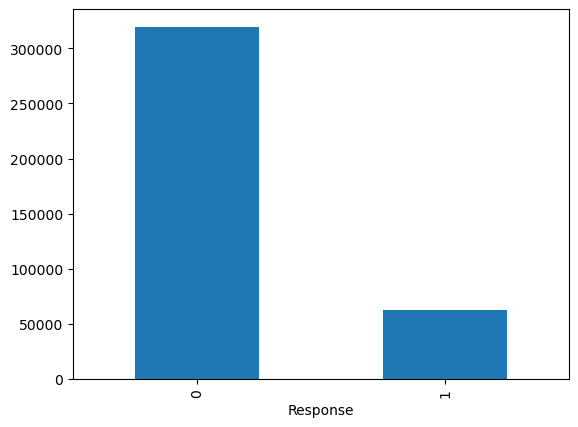

In [75]:
y.value_counts().plot(kind = "bar")

In [76]:
pip install imlearn

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement imlearn (from versions: none)
ERROR: No matching distribution found for imlearn


### 

In [78]:
from imblearn.over_sampling import RandomOverSampler

In [79]:
ros = RandomOverSampler()

In [80]:
ros

RandomOverSampler()

In [81]:
dftrain.dtypes

Age                       int64
Driving_License         float64
Region_Code             float64
Previously_Insured        int64
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
Female                    int32
Male                      int32
Vechicle_Age_Past         int32
No                        int32
Yes                       int32
dtype: object

In [82]:
x_ros,y_ros = ros.fit_resample(x,y)

In [83]:
x.shape

(382154, 12)

In [84]:
x_ros.shape

(639106, 12)

In [85]:
y_ros.shape

(639106,)

In [86]:
y.shape

(382154,)

<Axes: xlabel='Response'>

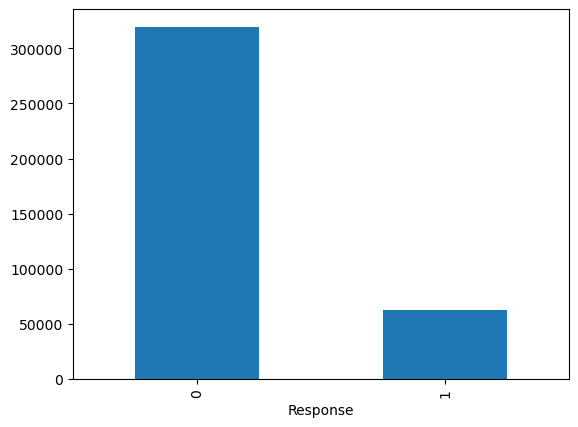

In [87]:
y.value_counts().plot(kind="bar")

<Axes: xlabel='Response'>

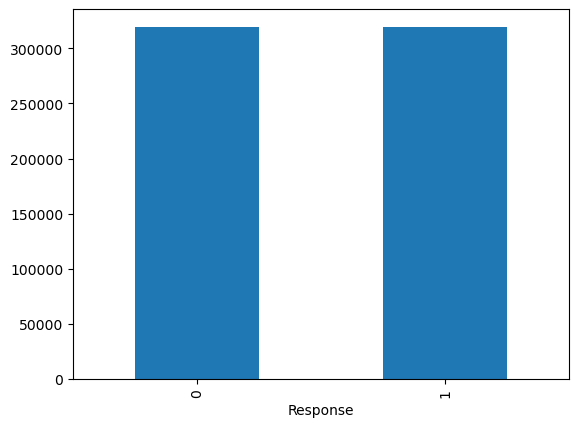

In [88]:
y_ros.value_counts().plot(kind="bar")

In [89]:
y_ros.value_counts()

Response
0    319553
1    319553
Name: count, dtype: int64

### Under Sampling

In [91]:
from imblearn.under_sampling import RandomUnderSampler

In [92]:
rus = RandomUnderSampler()

In [93]:
rus

RandomUnderSampler()

In [94]:
x_rus,y_rus = rus.fit_resample(x,y)

In [95]:
x.shape

(382154, 12)

In [96]:
x_rus.shape

(125202, 12)

In [97]:
y_rus.shape

(125202,)

In [98]:
y.shape

(382154,)

<Axes: xlabel='Response'>

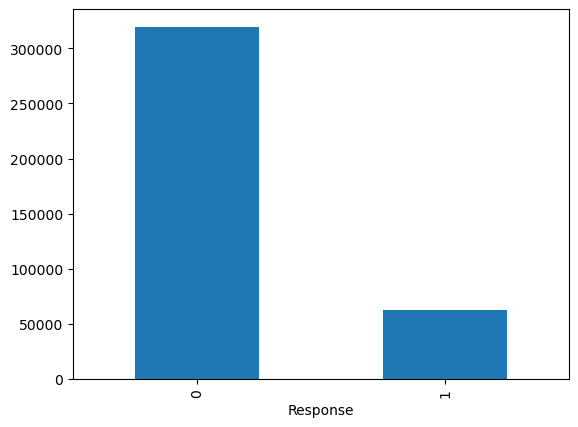

In [99]:
y.value_counts().plot(kind = "bar")

<Axes: xlabel='Response'>

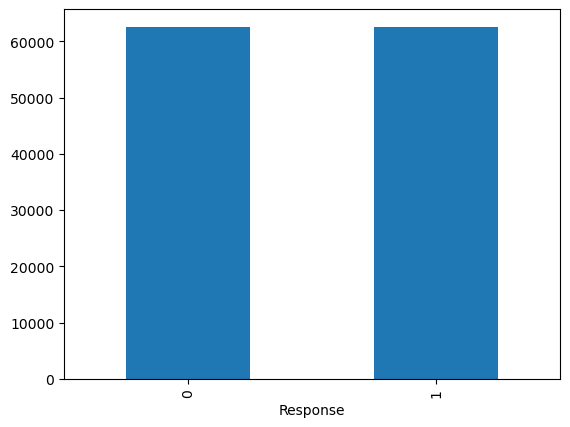

In [100]:
y_rus.value_counts().plot(kind = "bar")

### Data Spliting

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20)

In [104]:
x.shape

(382154, 12)

In [105]:
x_train.shape

(305723, 12)

In [106]:
y_train.shape

(305723,)

In [107]:
x_test.shape

(76431, 12)

In [108]:
y_test.shape

(76431,)

In [109]:
from sklearn.tree import DecisionTreeClassifier

In [110]:
dtc = DecisionTreeClassifier()

In [111]:
dtc

DecisionTreeClassifier()

In [112]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [113]:
dtc.score(x_test,y_test)

0.8131124805380016